In [1]:
!git clone https://github.com/Gokulapps/Pytorch-Model-Training-Base-Repo

Cloning into 'Pytorch-Model-Training-Base-Repo'...
remote: Enumerating objects: 401, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 401 (delta 108), reused 151 (delta 68), pack-reused 150
Receiving objects: 100% (401/401), 112.63 KiB | 4.17 MiB/s, done.
Resolving deltas: 100% (166/166), done.


In [4]:
%matplotlib inline
import torch 
import torchvision 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim 
import torch.autograd as grad
import matplotlib.pyplot as plt
import numpy as np
import argparse
import warnings
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from models.resnet import ResNet18 
from models.custom_resnet import CustomResnet
from models.transformer import Basic_Transformer
from utils import *
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from copy import deepcopy
warnings.filterwarnings("ignore")

=> Parallelizing Training across Multiple GPU's


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Finding Maximum Learning Rate for the Model
Iteration 1 with Values between 0.0001 and 4


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
Maximum Learning Rate Found by LRFinder = 0.031448533424673235
Iteration 2 with Values between 0.0031448533424673236 and 0.31448533424673236


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
Maximum Learning Rate Found by LRFinder = 0.019569072694630756
Training Logs...
EPOCH: 1


Loss=2.302375555038452 Batch_id=97 Accuracy=9.96: 100%|██████████| 98/98 [00:07<00:00, 12.65it/s]  



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 2


Loss=2.302567720413208 Batch_id=97 Accuracy=9.86: 100%|██████████| 98/98 [00:07<00:00, 13.73it/s]  



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 3


Loss=2.3025059700012207 Batch_id=97 Accuracy=9.85: 100%|██████████| 98/98 [00:07<00:00, 13.91it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 4


Loss=2.302722454071045 Batch_id=97 Accuracy=9.74: 100%|██████████| 98/98 [00:06<00:00, 14.27it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 5


Loss=2.302344560623169 Batch_id=97 Accuracy=9.84: 100%|██████████| 98/98 [00:06<00:00, 14.75it/s]  



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 6


Loss=2.3030271530151367 Batch_id=97 Accuracy=9.76: 100%|██████████| 98/98 [00:07<00:00, 13.93it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 7


Loss=2.3036916255950928 Batch_id=97 Accuracy=9.72: 100%|██████████| 98/98 [00:07<00:00, 13.89it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 8


Loss=2.303007125854492 Batch_id=97 Accuracy=9.76: 100%|██████████| 98/98 [00:07<00:00, 13.23it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 9


Loss=2.3030452728271484 Batch_id=97 Accuracy=10.04: 100%|██████████| 98/98 [00:06<00:00, 14.80it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 10


Loss=2.302799940109253 Batch_id=97 Accuracy=9.84: 100%|██████████| 98/98 [00:06<00:00, 14.24it/s]  



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 11


Loss=2.3024635314941406 Batch_id=97 Accuracy=9.91: 100%|██████████| 98/98 [00:06<00:00, 14.25it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 12


Loss=2.302851676940918 Batch_id=97 Accuracy=9.90: 100%|██████████| 98/98 [00:07<00:00, 13.57it/s]  



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 13


Loss=2.302616596221924 Batch_id=97 Accuracy=9.80: 100%|██████████| 98/98 [00:06<00:00, 14.94it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 14


Loss=2.3029026985168457 Batch_id=97 Accuracy=9.83: 100%|██████████| 98/98 [00:06<00:00, 14.16it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 15


Loss=2.3027544021606445 Batch_id=97 Accuracy=9.70: 100%|██████████| 98/98 [00:06<00:00, 14.03it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 16


Loss=2.3026108741760254 Batch_id=97 Accuracy=9.89: 100%|██████████| 98/98 [00:07<00:00, 13.98it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 17


Loss=2.3027493953704834 Batch_id=97 Accuracy=9.68: 100%|██████████| 98/98 [00:06<00:00, 14.37it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 18


Loss=2.3026249408721924 Batch_id=97 Accuracy=9.76: 100%|██████████| 98/98 [00:06<00:00, 14.01it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 19


Loss=2.302577495574951 Batch_id=97 Accuracy=9.78: 100%|██████████| 98/98 [00:06<00:00, 14.18it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 20


Loss=2.3026158809661865 Batch_id=97 Accuracy=9.79: 100%|██████████| 98/98 [00:07<00:00, 13.61it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 21


Loss=2.302581310272217 Batch_id=97 Accuracy=9.84: 100%|██████████| 98/98 [00:06<00:00, 14.48it/s]  



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 22


Loss=2.302610397338867 Batch_id=97 Accuracy=9.86: 100%|██████████| 98/98 [00:06<00:00, 14.04it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 23


Loss=2.302588939666748 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.98it/s] 



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 24


Loss=2.3025920391082764 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.58it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

Model Saved
Plotting Graphs


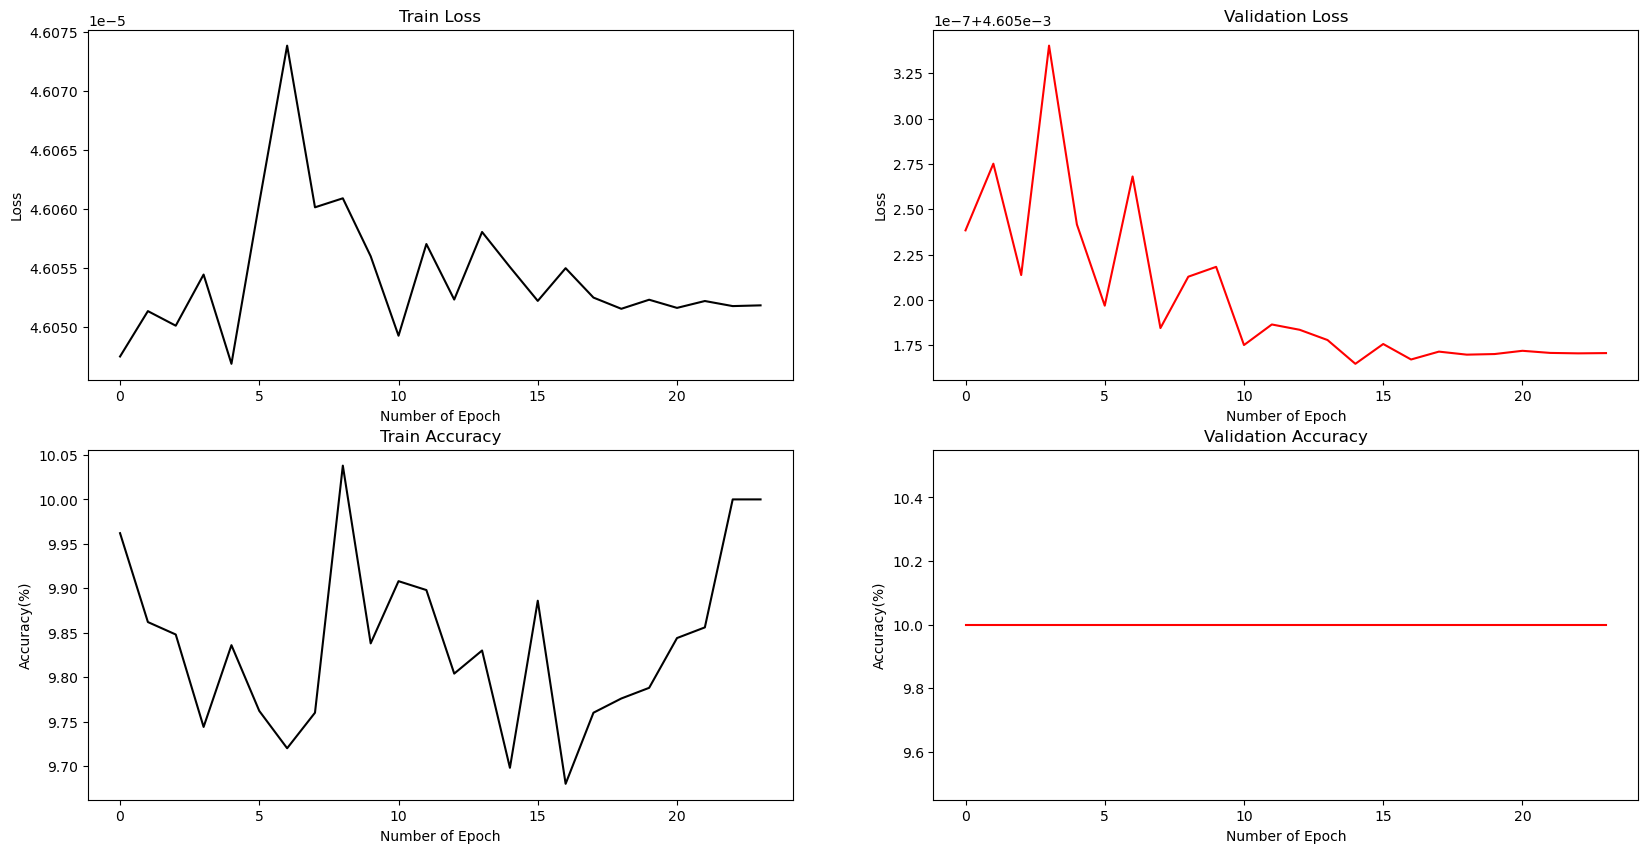

Displaying Sample Images from Dataset
Main File Completed!!!


In [5]:
%matplotlib inline
%run main.py CIFAR10 24 512 0.01 --Adam

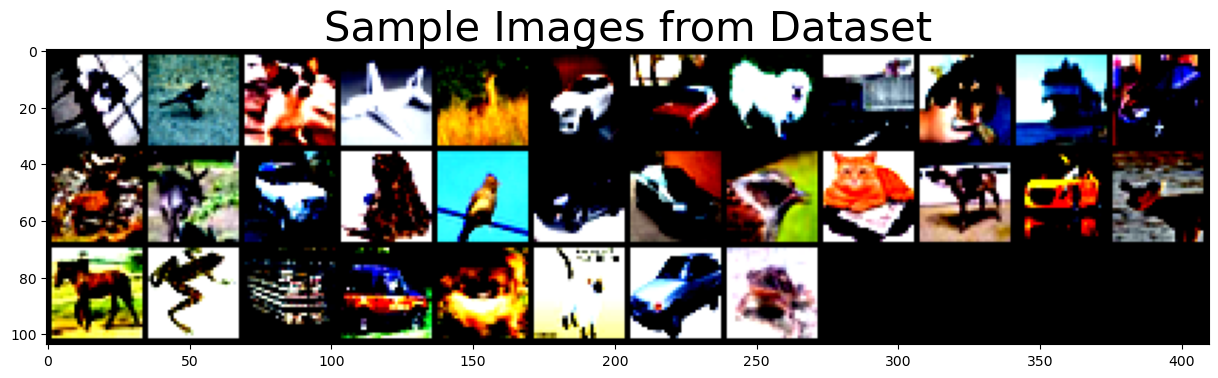

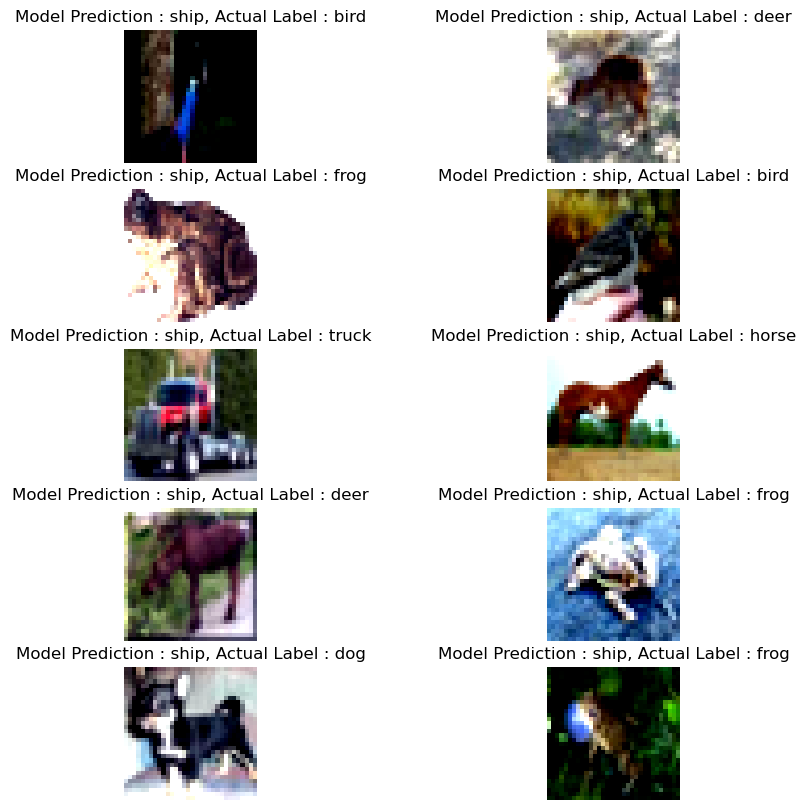

In [6]:
incorrect_predictions = misclassified_images(model, device, test_loader, 10)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_misclassified_images(incorrect_predictions, classes, 5, 2, 10, fig_size=(10, 10))